In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from matplotlib.pyplot import cm
from scipy import stats

In [2]:
features = pd.read_csv("/home/camar_temp/git-repos/buckets/bkt_prd_dsv_brain_therapy_raw/Features/Working_Memory/features_WM_ANOVA_context_level.csv")

In [3]:
features.head()

,Unnamed: 0,Participant,context,Datetime,type,ecg_heart_rate,ecg_hrv_std,skin_temperature,eda_mean,eda_no_of_peaks,eda_lf,eda_hf,eda_lf_hf_ratio,context_order,type_index
0,0,22,T3,2019-08-22 13:21:30,3D,81.868640,20.959716,29.564149,25.213686,34,0.075022,0.021432,3.500512,1,1
1,1,22,T2,2019-08-22 13:23:40,3D,84.448546,19.194742,29.698874,24.786067,38,0.044270,0.018883,2.344475,2,1
2,2,22,T4,2019-08-22 13:25:50,3D,84.693468,21.302250,30.016843,24.242334,35,0.025854,0.005885,4.393562,3,1
3,3,22,T1,2019-08-22 13:28:00,3D,83.809464,26.930735,30.575404,24.163139,41,0.031154,0.006216,5.011903,4,1
4,4,22,T1,2019-08-22 13:37:44,2D,79.382173,38.770237,30.393101,23.005149,22,0.038376,0.011557,3.320630,1,0


In [4]:
columns = features.columns
features = features[columns[1:]]

In [5]:
features.set_index(["Participant","type","context","Datetime"], inplace = True)
features.head()

ecg_heart_rate  ecg_hrv_std  \
Participant type context Datetime                                           
22          3D   T3      2019-08-22 13:21:30       81.868640    20.959716   
                 T2      2019-08-22 13:23:40       84.448546    19.194742   
                 T4      2019-08-22 13:25:50       84.693468    21.302250   
                 T1      2019-08-22 13:28:00       83.809464    26.930735   
            2D   T1      2019-08-22 13:37:44       79.382173    38.770237   

                                              skin_temperature   eda_mean  \
Participant type context Datetime                                           
22          3D   T3      2019-08-22 13:21:30         29.564149  25.213686   
                 T2      2019-08-22 13:23:40         29.698874  24.786067   
                 T4      2019-08-22 13:25:50         30.016843  24.242334   
                 T1      2019-08-22 13:28:00         30.575404  24.163139   
            2D   T1      2019-08-22 13:37:44         30.393101  23.005149   

                                              eda_no_of_peaks    eda_lf  \
Participant type context Datetime                                         
22          3D   T3      2019-08-22 13:21:30               34  0.075022   
                 T2      2019-08-22 13:23:40               38  0.044270   
                 T4      2019-08-22 13:25:50               35  0.025854   
                 T1      2019-08-22 13:28:00               41  0.031154   
            2D   T1      2019-08-22 13:37:44               22  0.038376   

                                                eda_hf  eda_lf_hf_ratio  \
Participant type context Datetime                                         
22          3D   T3      2019-08-22 13:21:30  0.021432         3.500512   
                 T2      2019-08-22 13:23:40  0.018883         2.344475   
                 T4      2019-08-22 13:25:50  0.005885         4.393562   
                 T1      2019-08-22 13:28:00  0.006216         5.011903   
            2D   T1      2019-08-22 13:37:44  0.011557         3.320630   

                                              context_order  type_index  
Participant type context Datetime                                        
22          3D   T3      2019-08-22 13:21:30              1           1  
                 T2      2019-08-22 13:23:40              2           1  
                 T4      2019-08-22 13:25:50              3           1  
                 T1      2019-08-22 13:28:00              4           1  
            2D   T1      2019-08-22 13:37:44              1           0

In [6]:
sensor_features = features.columns[:-2]
# sensor_features = [x for x in sensor_features if x not in ['skin_temperature','eda_mean']]
sensor_features

Index(['ecg_heart_rate', 'ecg_hrv_std', 'skin_temperature', 'eda_mean',
       'eda_no_of_peaks', 'eda_lf', 'eda_hf', 'eda_lf_hf_ratio'],
      dtype='object')

/home/camar_temp/.conda/envs/btsrd/lib/python3.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/camar_temp/.conda/envs/btsrd/lib/python3.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/camar_temp/.conda/envs/btsrd/lib/python3.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

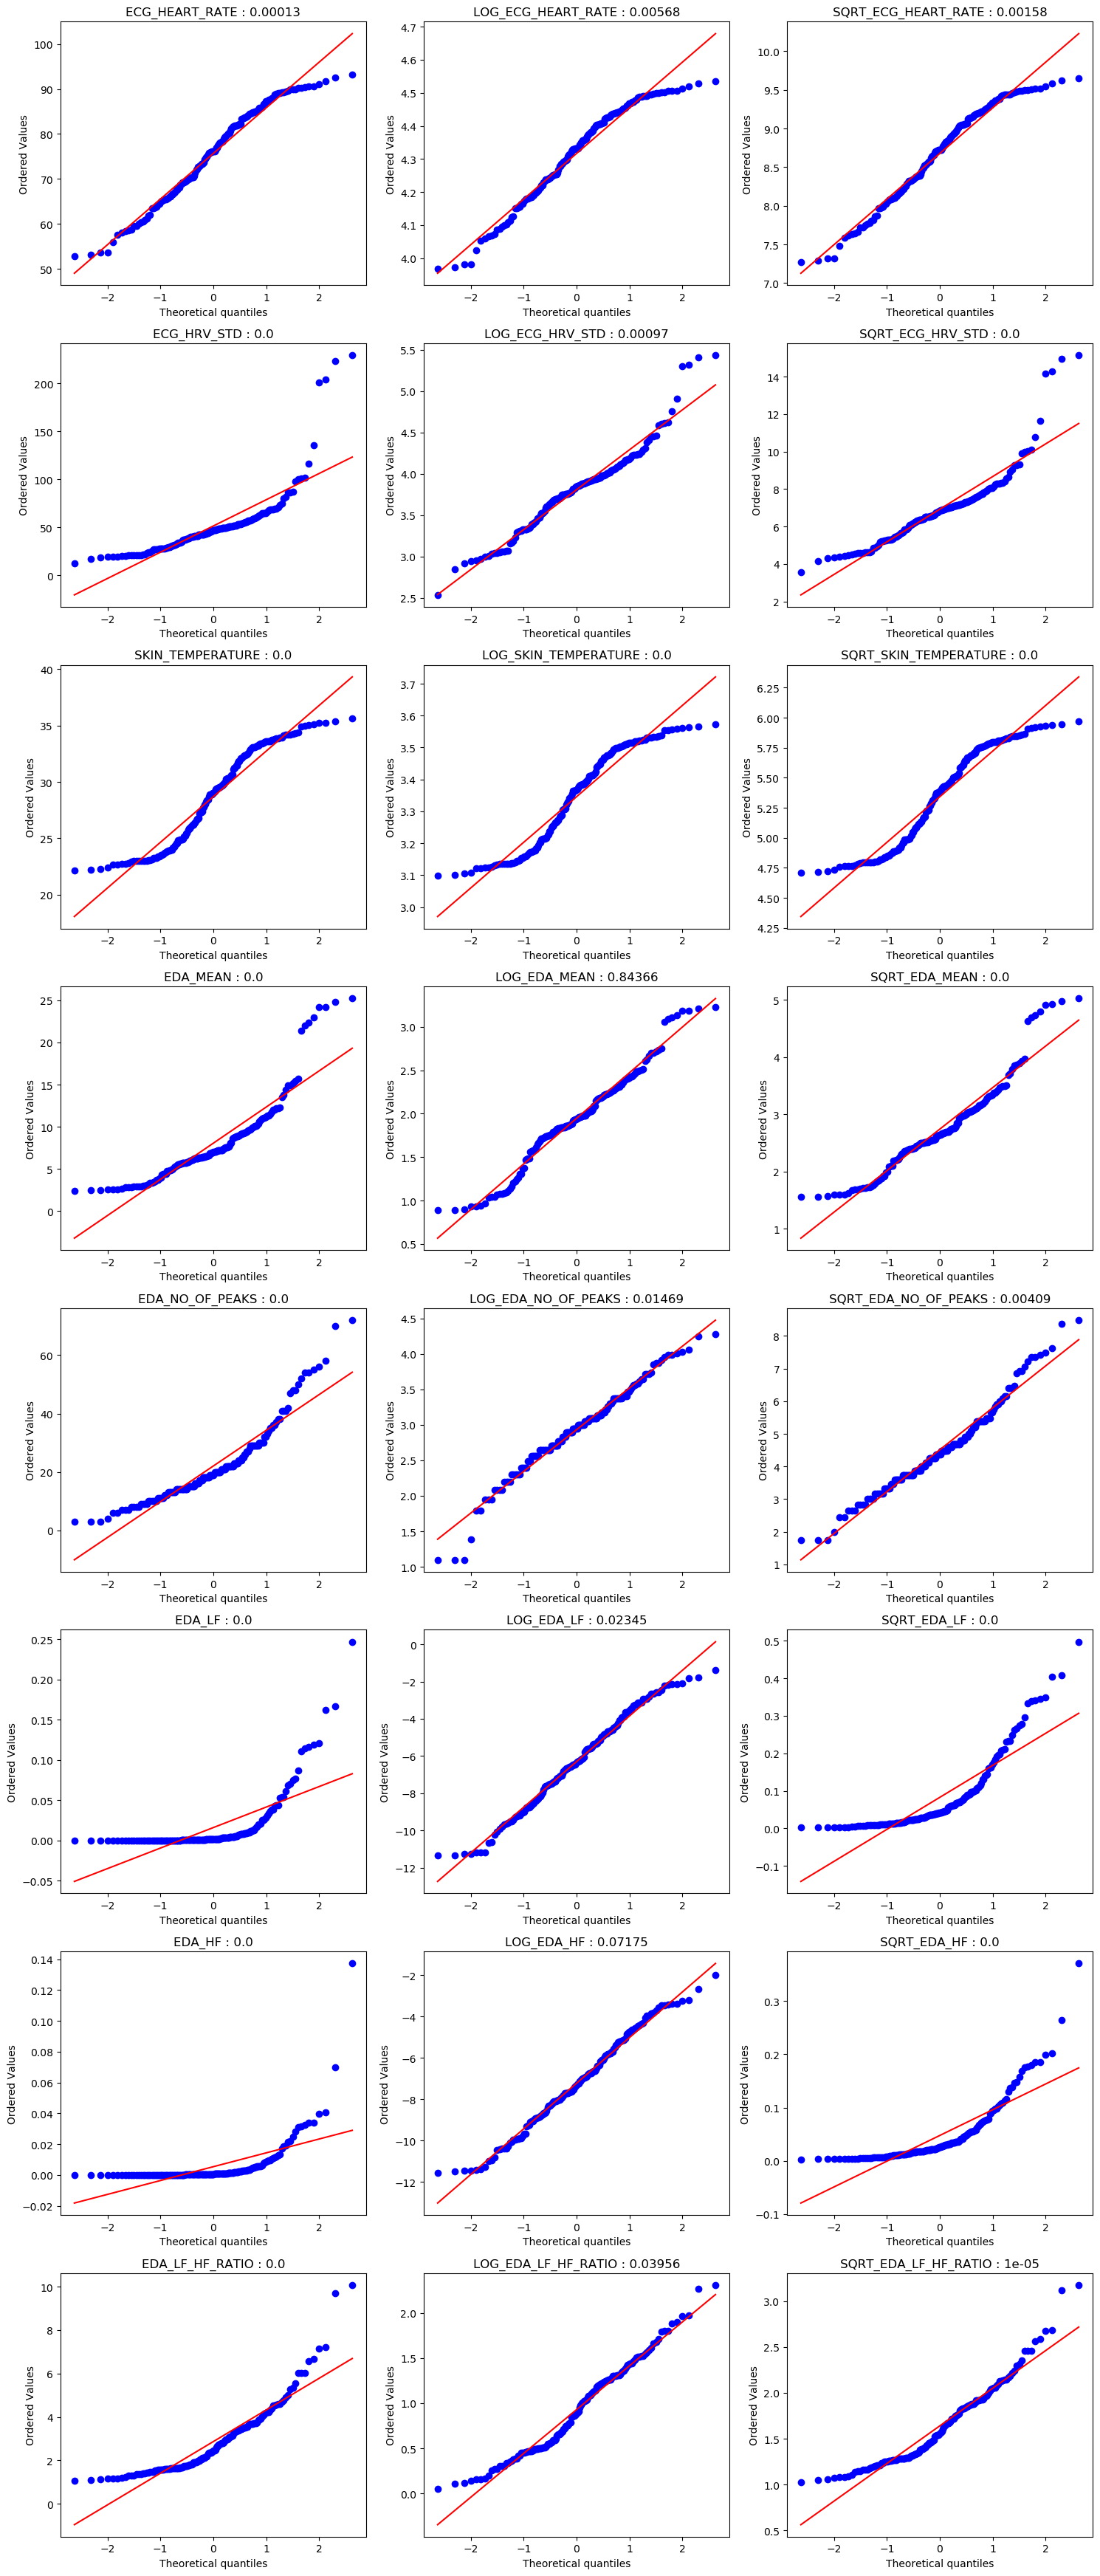

In [8]:

fig, axes = plt.subplots(8,3, figsize = (15,35), dpi = 100)
ax = axes.flatten()
i = 0
for sensor_feature in sensor_features:
    data = features[[sensor_feature]]
    ss = stats.probplot(data[sensor_feature].values, dist = "norm",  plot = ax[i])
    k2, p = stats.normaltest(data[sensor_feature].values)
    ax[i].set_title("{} : {}".format(sensor_feature.upper(),np.round(p,5)))
    
    data["log"] = np.log(data[sensor_feature].values)
    data.dropna(inplace = True)
    ss = stats.probplot(data["log"].values, dist = "norm", plot = ax[i+1])
    k2, p = stats.normaltest(data["log"].values)
    ax[i+1].set_title("LOG_{} : {}".format(sensor_feature.upper(), np.round(p,5)))
    
    data["sqrt"] = np.sqrt(data[sensor_feature].values)
    data.dropna(inplace = True)
    ss = stats.probplot(data["sqrt"].values, dist = "norm", plot = ax[i+2])
    k2, p = stats.normaltest(data["sqrt"].values)
    ax[i+2].set_title("SQRT_{} : {}".format(sensor_feature.upper(), np.round(p,5)))
    i+=3
plt.tight_layout()
plt.show()
#     plt.plot(ss)